## Importing Required Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

### Loading data

In [27]:
data = pd.read_csv(r'./irisData.csv')

In [28]:
data['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

### Sample of data

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratary Data Analysis

### Univariate analysis

In [9]:
print("No. of Columns : {} || No. of Rows : {} ".format(data.shape[1],data.shape[0]))

No. of Columns : 5 || No. of Rows : 150 


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


The data contains one String column and 4 floating point columns with 150 entries with no null values

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Petal length has largest Variation
Sepal width has smallest variance

As the data is small enoguh we can plot whole data and see the distribution for individual columns

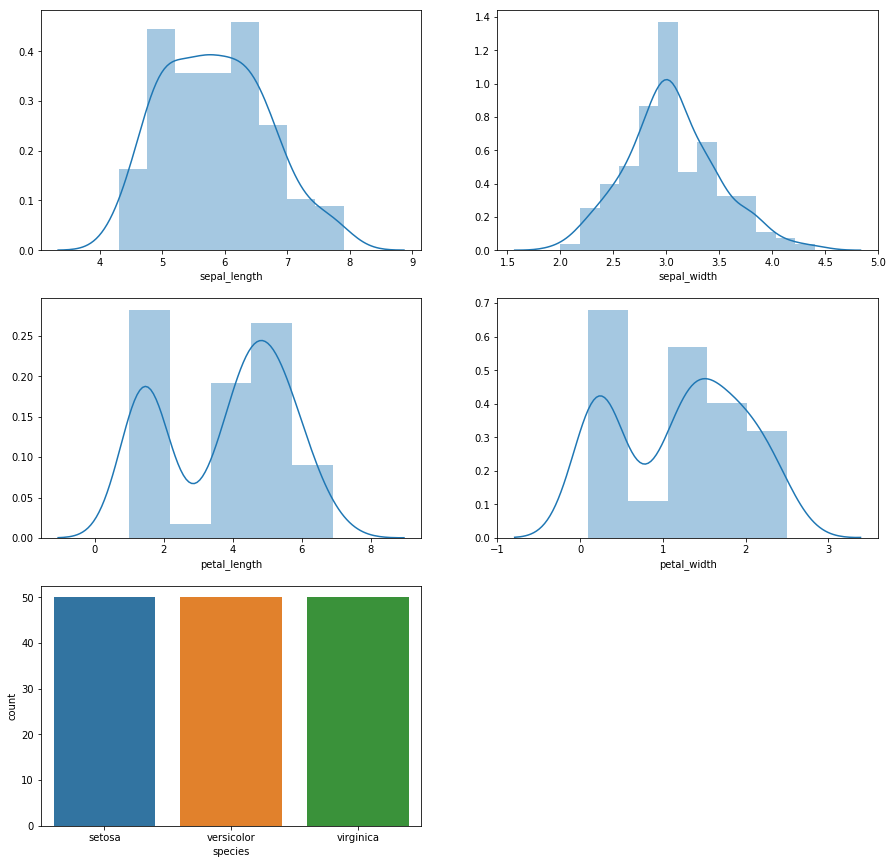

In [31]:
figure = plt.figure(figsize=(15,15))
plt.subplot(321)
sns.distplot(data['sepal_length'])
plt.subplot(322)
sns.distplot(data['sepal_width'])
plt.subplot(323)
sns.distplot(data['petal_length'])
plt.subplot(324)
sns.distplot(data['petal_width'])
plt.subplot(325)
sns.categorical.countplot(data['species'])


Equal data available for each of the species listed

Distribution plots indicating that petal length and width showing distinct patterns with values segregated at few points
So lets look at them w.r.t species to identify any pattern

Equal data available for each of the species listed

In [40]:
data.groupby(by='species').agg({'petal_length':[np.min,np.max,np.mean],'petal_width':[np.min,np.max,np.mean],
                              'sepal_length':[np.min,np.max,np.mean],'sepal_width':[np.min,np.max,np.mean]})

petal_length             petal_width             sepal_length       \
                   amin amax   mean        amin amax   mean         amin amax   
species                                                                         
setosa              1.0  1.9  1.464         0.1  0.6  0.244          4.3  5.8   
versicolor          3.0  5.1  4.260         1.0  1.8  1.326          4.9  7.0   
virginica           4.5  6.9  5.552         1.4  2.5  2.026          4.9  7.9   

                  sepal_width              
             mean        amin amax   mean  
species                                    
setosa      5.006         2.3  4.4  3.418  
versicolor  5.936         2.0  3.4  2.770  
virginica   6.588         2.2  3.8  2.974

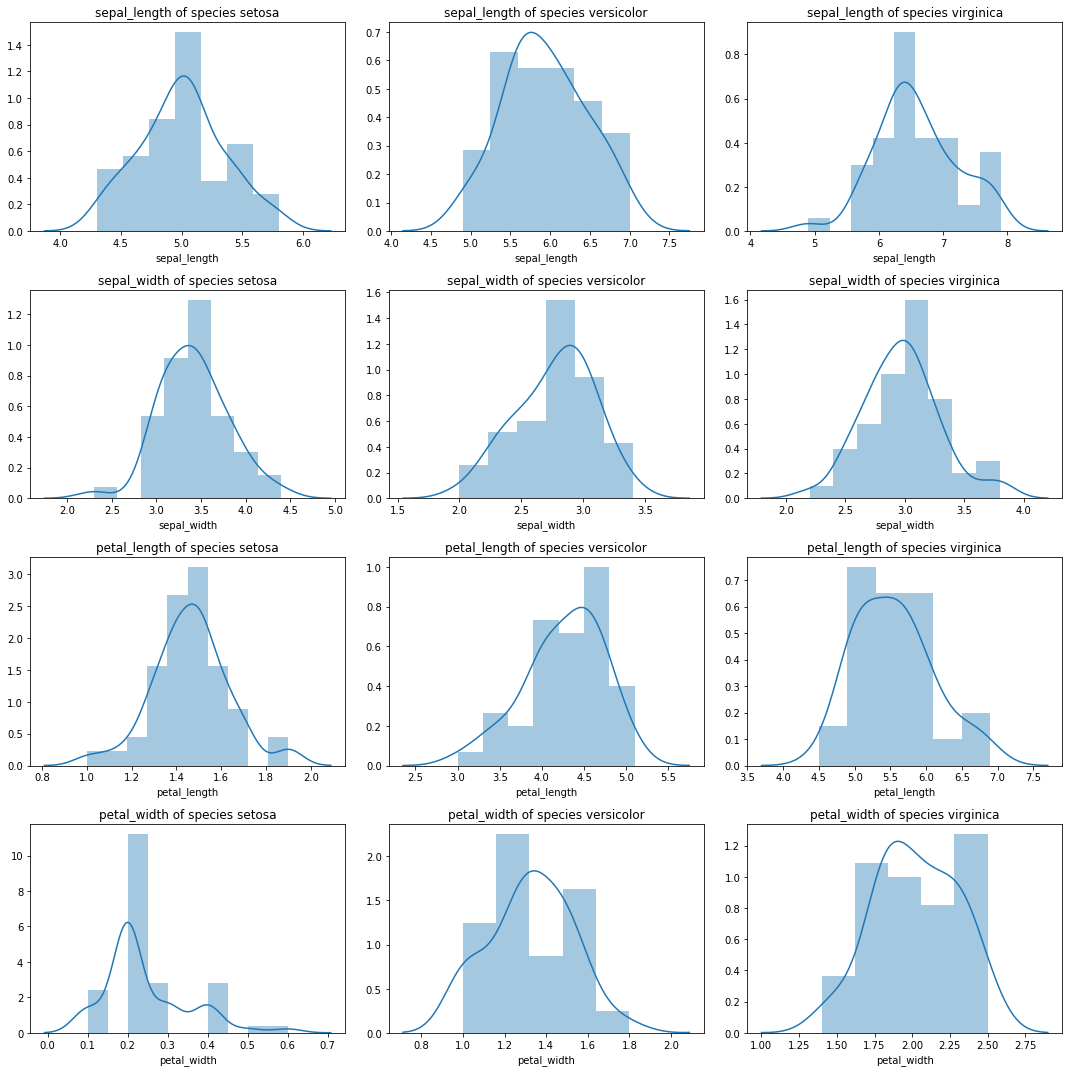

In [114]:
columns = data.columns.values.tolist()
columns.remove('species')
specieses = ['setosa','versicolor','virginica']
total_plots = len(columns)*len(specieses)
plotNumber = 1
no_of_rows = total_plots//3
no_of_columns = 3
fig = plt.figure(figsize=(15,15))
for column in columns:
    for species in specieses:
        title = column + ' of species '+species
        plt.subplot(no_of_rows,no_of_columns,plotNumber).set_title(title)
        sns.distplot(data[data['species']==species][column])
        plotNumber +=1
plt.tight_layout()
plt.show()


From the values we can see that we can easily seperate the setosa from the other three classes just by looking
at the petal width and petal length columns

Looking at the petal length values itself we can say Setosa species differs as maximum value of the petal length is lower than minimum value of other species

### Bi Variate Analysis

Let us just combine the two column values repeatedly and look at distribution of the resulting for the remaining two clasees

In [117]:
data_versicolor = data[data['species']!='versicolor']
data_virginica = data[data['species']!='virginica']

Let us add Petal length and petal width values to see if it gives us any idea

In [120]:
data_remaining_classes = data[data['species']!='setosa']

In [131]:
data_remaining_classes['petal_length_+_width'] = data_remaining_classes['petal_length'] + data_remaining_classes['petal_width']
data_remaining_classes['sepal_length_+_width'] = data_remaining_classes['sepal_length'] + data_remaining_classes['sepal_width']
data_remaining_classes['petal_length_+sepal_length'] = data_remaining_classes['petal_length'] + data_remaining_classes['sepal_length']
data_remaining_classes['petal_length_+sepal_width'] = data_remaining_classes['petal_length'] + data_remaining_classes['sepal_width']
data_remaining_classes['petal_width_+sepal_length'] = data_remaining_classes['petal_width'] + data_remaining_classes['sepal_length']
data_remaining_classes['petal_width_+sepal_width'] = data_remaining_classes['petal_width'] + data_remaining_classes['sepal_width']

C:\Users\Giridhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Giridhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Giridhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [134]:
data_remaining_classes.groupby(by='species').agg({'petal_length_+_width':[np.min,np.max,np.mean],
                                                 'sepal_length_+_width':[np.min,np.max,np.mean],
                                                'petal_length_+sepal_length':[np.min,np.max,np.mean],
                                                'petal_length_+sepal_width':[np.min,np.max,np.mean],
                                                'petal_width_+sepal_length':[np.min,np.max,np.mean],
                                                'petal_width_+sepal_width':[np.min,np.max,np.mean]
                                                 })

petal_length_+_width             sepal_length_+_width               \
                           amin amax   mean                 amin  amax   mean   
species                                                                         
versicolor                  4.1  6.7  5.586                  7.0  10.2  8.706   
virginica                   6.2  9.2  7.578                  7.4  11.7  9.562   

           petal_length_+sepal_length               petal_length_+sepal_width  \
                                 amin  amax    mean                      amin   
species                                                                         
versicolor                        8.1  11.8  10.196                       5.5   
virginica                         9.4  14.6  12.140                       7.0   

                        petal_width_+sepal_length               \
            amax   mean                      amin  amax   mean   
species                                                          
versicolor   8.0  7.030                       5.9   8.4  7.262   
virginica   10.5  8.526                       6.6  10.0  8.614   

           petal_width_+sepal_width              
                               amin amax   mean  
species                                          
versicolor                      3.0  5.0  4.096  
virginica                       3.7  6.1  5.000